<a href="https://colab.research.google.com/github/Ivonne9140/ML_Ivonne/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [430]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
%matplotlib inline

In [431]:
url='https://raw.githubusercontent.com/Ivonne9140/ML_Ivonne/main/test_set.csv'
df=pd.read_csv(url)
df['Fault']=df['Fault'].map({
    '0': 'Pass',
    'sa0':'sa0',
    'sa1':'sa1'
})
labels = df['Fault'].tolist()
df['Class']=labels
print (df)

    Position  Expected  Actual Fault Class
0          1         0       0  Pass  Pass
1          2         0       0  Pass  Pass
2          3         1       1  Pass  Pass
3          4         1       1   sa0   sa0
4          5         0       0  Pass  Pass
5          6         0       0  Pass  Pass
6          7         1       1  Pass  Pass
7          8         1       1   sa0   sa0
8          9         0       1  Pass  Pass
9         10         0       0  Pass  Pass
10        11         1       1  Pass  Pass
11        12         1       1   sa0   sa0
12         1         0       0  Pass  Pass
13         2         0       1   sa1   sa1
14         3         1       1  Pass  Pass
15         4         1       1  Pass  Pass
16         5         0       0  Pass  Pass
17         6         0       1   sa1   sa1
18         7         1       1  Pass  Pass
19         8         1       1  Pass  Pass
20         9         0       0  Pass  Pass
21        10         0       1   sa1   sa1
22        1

In [432]:
target_names = ['sa0','sa1','Pass']
#df['Fault_type']=df.Class.apply(lambda x:target_names[x])
#print(df)

In [433]:
df1=df[df.Class=='sa0']
df2=df[df.Class=='sa1']
df3=df[df.Class=='Pass']


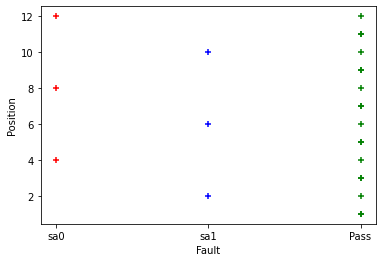

In [434]:
plt.xlabel('Fault')
plt.ylabel('Position')
plt.scatter(df1['Fault'],df1['Position'], color='red',marker='+')
plt.scatter(df2['Fault'],df2['Position'], color='blue',marker='+')
plt.scatter(df3['Fault'],df3['Position'], color='green',marker='+')

In [435]:
x=df.drop(['Class','Fault'],axis='columns')
x.head()

,Position,Expected,Actual
0,1,0,0
1,2,0,0
2,3,1,1
3,4,1,1
4,5,0,0


In [436]:
y=df.Class

In [437]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)


In [438]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

18
6
18
6


In [439]:
model = SVC(kernel='linear') #Support Vector Classifier

In [440]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [441]:
predictions=model.predict(x_test)
print (predictions)

['Pass' 'Pass' 'Pass' 'Pass' 'Pass' 'Pass']


In [442]:
percentage = model.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


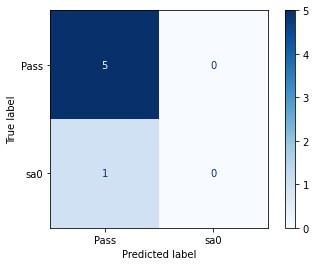

Confusion Matrix
[[5 0]
 [1 0]]
Test Set: 6
Accuracy = 83.33333333333334 %


In [444]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
plot_confusion_matrix(model,x_test, y_test, cmap=plt.cm.Blues)
plt.show()
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(x_test)}")
print(f"Accuracy = {percentage*100} %")

In [445]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        Pass       0.83      1.00      0.91         5
         sa0       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
